Data overview and cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the data
df = pd.read_csv('1. Weather Data.csv')

In [5]:
# Displaying basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [6]:
# Checking for missing values
print(df.isnull().sum())

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [7]:
# Checking for duplicate records
print(f"Number of duplicate records: {df.duplicated().sum()}")

Number of duplicate records: 0


Statistical Summary

In [8]:
# Generate statistical summary
print(df.describe())

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


In [9]:
# Identifying outliers using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [10]:

# Checking for outliers in numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    outliers = find_outliers(column)
    print(f"Outliers in {column}: {len(outliers)}")

Outliers in Temp_C: 0
Outliers in Dew Point Temp_C: 0
Outliers in Rel Hum_%: 2
Outliers in Wind Speed_km/h: 162
Outliers in Visibility_km: 3539
Outliers in Press_kPa: 207


Data visualization

/home/emery/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/emery/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/emery/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/emery/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

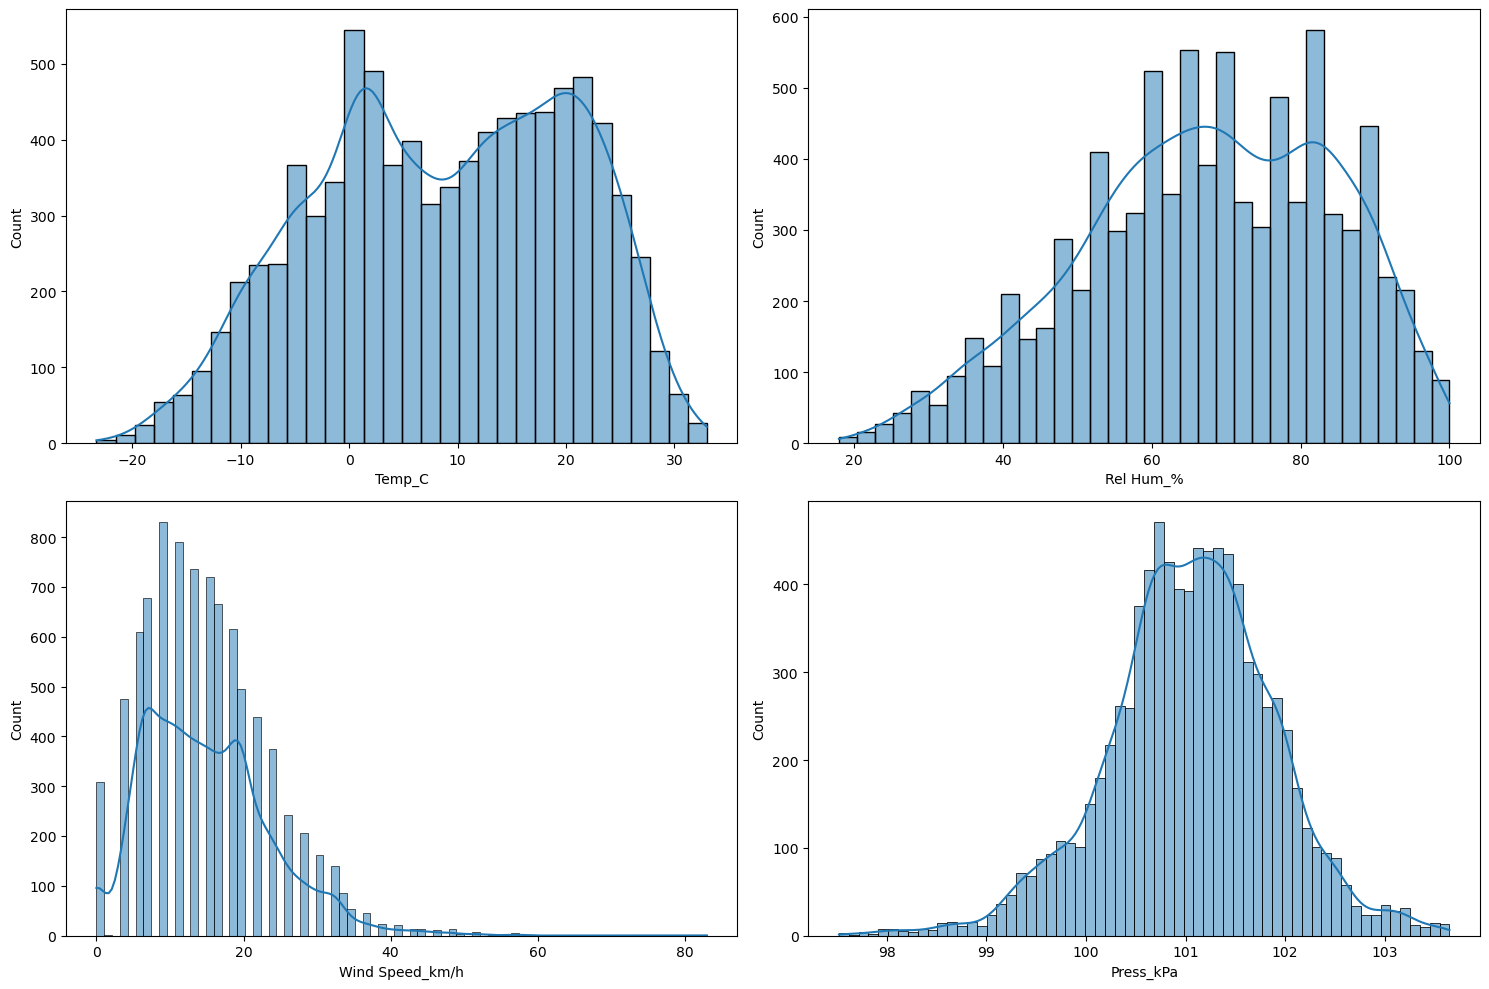

In [11]:
# Distribution of key weather parameters
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Temp_C'], kde=True, ax=axes[0, 0])
sns.histplot(df['Rel Hum_%'], kde=True, ax=axes[0, 1])
sns.histplot(df['Wind Speed_km/h'], kde=True, ax=axes[1, 0])
sns.histplot(df['Press_kPa'], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [15]:

# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])


In [16]:
# Computing the correlation matrix
corr_matrix = numeric_df.corr()

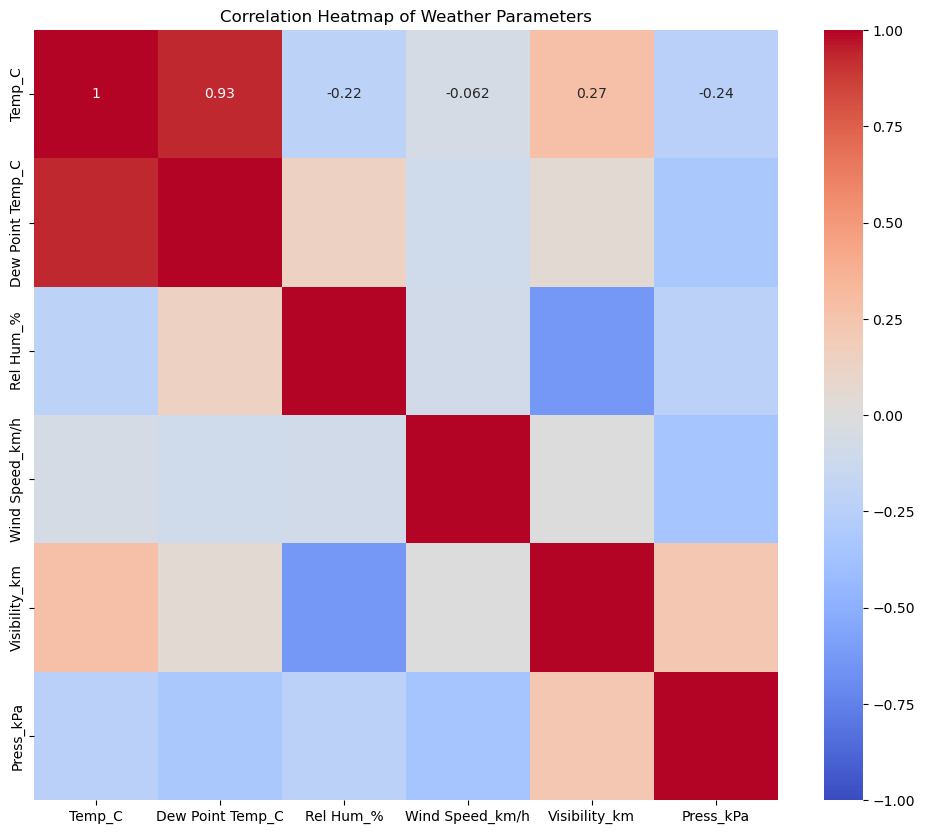

In [17]:
# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Weather Parameters')
plt.show()

In [18]:

print(corr_matrix)

                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000  


Weather patterns and trends

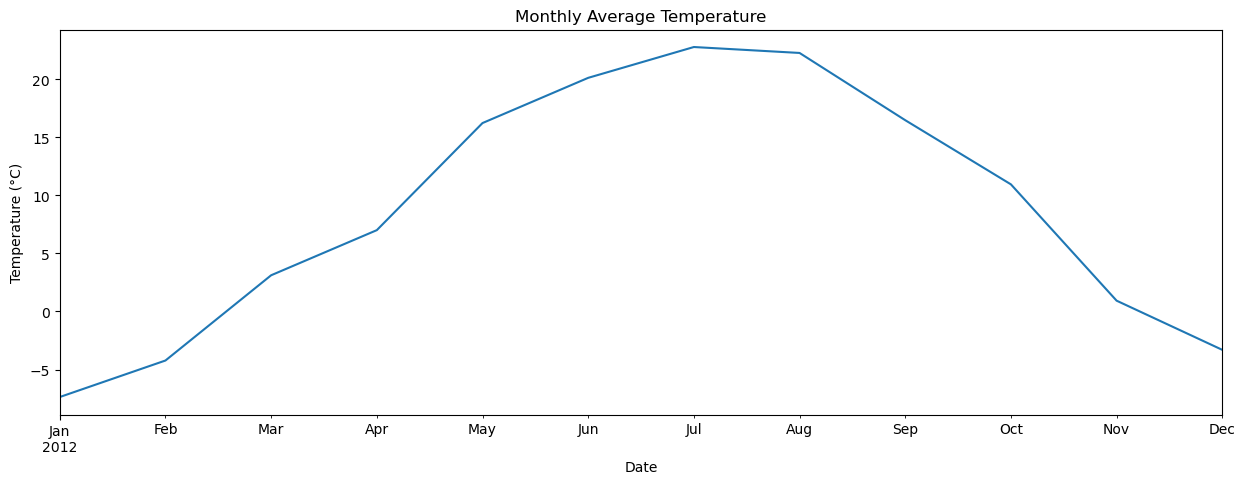

In [20]:
# Monthly average temperature
monthly_temp = df['Temp_C'].resample('M').mean()
plt.figure(figsize=(15, 5))
monthly_temp.plot()
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

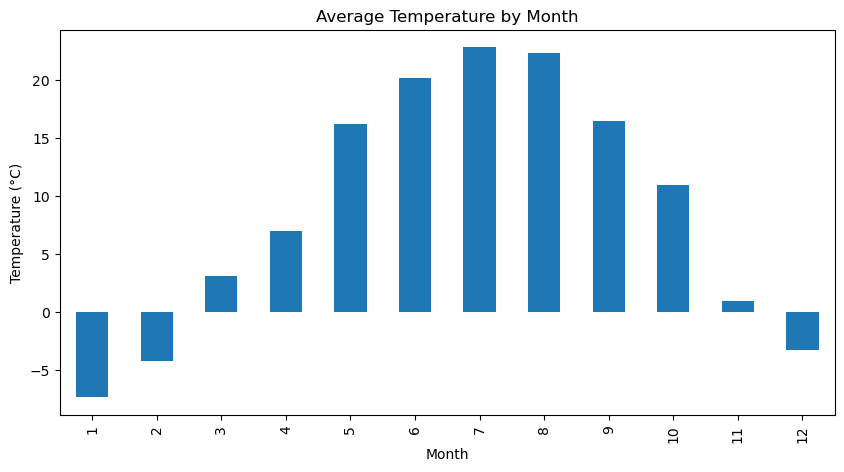

In [21]:
# Seasonal patterns
df['Month'] = df.index.month
seasonal_temp = df.groupby('Month')['Temp_C'].mean()
plt.figure(figsize=(10, 5))
seasonal_temp.plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()